# Dispositivos que más participaron y evolución de su participación en el tiempo

In [168]:
imprimir = top_devices.reset_index()
imprimir.columns = ['dispositivo', 'participaciones']
imprimir['alias'] = ['A', 'B', 'C', 'D', 'E']
imprimir

,dispositivo,participaciones,alias
0,633139769114048761,27762,A
1,7202276635029175071,23055,B
2,7298861376107043945,18188,C
3,6302840482782120473,16400,D
4,5376802567578262905,16367,E


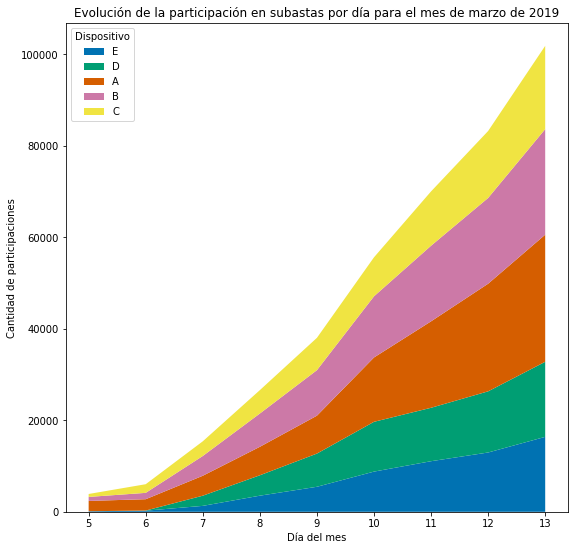

In [169]:
# Data
x= [x for x in range(5, 14)]
y= [evolucion[i] for i in evolucion.columns]

# El alias se asignó después de ver como se hacía el plot.
nombres = ['E', 'D', 'A', 'B', 'C']

# Plot
plt.figure(figsize=(9, 9))
plt.stackplot(x, y, labels=nombres)
plt.legend(loc='upper left', title='Dispositivo', )
plt.title('Evolución de la participación en subastas por día para el mes de marzo de 2019')
plt.xlabel('Día del mes')
plt.ylabel('Cantidad de participaciones')
plt.show()

# Horario de la mayor cantidad de clicks

Luego de analizar los datos se observó que debido a la precisión con que se registran los clicks, sólamente hubo cuatro horarios con precisión al milisegundo que tuvieron dos clicks. Luego se tomaron intervalos de una hora para ver cuáles fueron los horarios con mayor cantidad de clicks.

In [257]:
#Cantidad de clicks
clicks.groupby(clicks['created']).agg('count')['advertiser_id'].nlargest(7)

created
2019-03-07 23:16:30.731    2
2019-03-07 23:24:46.085    2
2019-03-10 01:37:34.402    2
2019-03-10 05:02:10.703    2
2019-03-05 01:17:30.663    1
2019-03-05 01:44:16.824    1
2019-03-05 02:07:49.451    1
Name: advertiser_id, dtype: int64

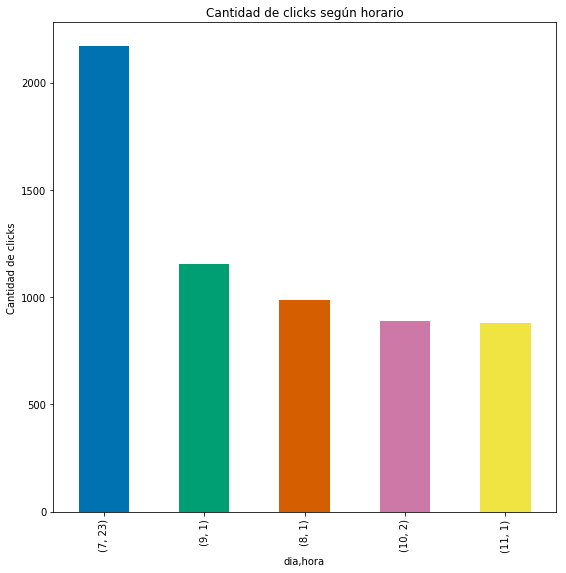

In [255]:
plt.figure(figsize=(9, 9))
plt.title('Cantidad de clicks según horario')
plt.ylabel('Cantidad de clicks')
n_clicks.plot(kind='bar');

# -------------------------------

# Análisis utilizado para generar las visualizaciones

## Dispositivos

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
sns.set_palette(palette='colorblind')

In [2]:
overview = pd.read_csv('auctions.csv', nrows=10000)

In [3]:
overview.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [4]:
overview.dtypes

auction_type_id    float64
country              int64
date                object
device_id            int64
platform             int64
ref_type_id          int64
source_id            int64
dtype: object

In [7]:
overview['country'].value_counts()

6333597102633388268    10000
Name: country, dtype: int64

In [16]:
overview['device_id'].value_counts().size

4835

In [17]:
overview['platform'].value_counts().size

2

In [18]:
overview['ref_type_id'].value_counts().size

2

In [19]:
overview['source_id'].value_counts().size

4

In [12]:
overview['auction_type_id'].isna().all()

True

In [8]:
overview.describe()

,auction_type_id,country,device_id,platform,ref_type_id,source_id
count,0.0,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,NaN,6.333597e+18,4.608485e+18,1.150400,1.902400,0.800600
std,NaN,1.062965e+06,2.684330e+18,0.357481,2.144886,1.661901
min,NaN,6.333597e+18,9.777057e+14,1.000000,1.000000,0.000000
25%,NaN,6.333597e+18,2.185244e+18,1.000000,1.000000,0.000000
50%,NaN,6.333597e+18,4.533410e+18,1.000000,1.000000,0.000000
75%,NaN,6.333597e+18,6.939100e+18,1.000000,1.000000,1.000000
max,NaN,6.333597e+18,9.223081e+18,2.000000,7.000000,6.000000


In [20]:
dtypes_dict = {'country' : 'category', \
               'device_id' : 'category', \
               'platform' : 'category', \
               'ref_type_id' : 'category', \
               'source_id' : 'category'}

In [23]:
auctions = pd.read_csv('auctions.csv', dtype=dtypes_dict)

In [25]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [39]:
auctions['date'] = pd.to_datetime(auctions['date'])

In [155]:
top_devices = auctions['device_id'].value_counts()[0:5]

In [41]:
flag = (auctions['device_id'] == top_devices.index[0]) | \
       (auctions['device_id'] == top_devices.index[1]) | \
       (auctions['device_id'] == top_devices.index[2]) | \
       (auctions['device_id'] == top_devices.index[3]) | \
       (auctions['device_id'] == top_devices.index[4])

In [49]:
auctions_top_devices = auctions.loc[flag, ['device_id', 'date']]

In [58]:
auctions_top_devices.sort_values(by='date', inplace=True)
auctions_top_devices['n_auction'] = auctions_top_devices.groupby('device_id')['date'].agg('cumcount')

In [59]:
auctions_top_devices['date'].describe()

count                         101772
unique                        101772
top       2019-03-09 15:28:02.257557
freq                               1
first     2019-03-05 00:53:29.247891
last      2019-03-13 23:59:15.023111
Name: date, dtype: object

In [60]:
auctions_top_devices['day'] = auctions_top_devices['date'].dt.day

In [62]:
auctions_top_devices.head()

,device_id,date,n_auction,day
9915406,5376802567578262905,2019-03-05 00:53:29.247891,0,5
7338645,633139769114048761,2019-03-05 00:54:15.900817,0,5
15970606,633139769114048761,2019-03-05 00:54:26.022010,1,5
7339945,633139769114048761,2019-03-05 00:54:26.790257,2,5
14747978,633139769114048761,2019-03-05 00:54:43.284826,3,5


In [93]:
# Reshape para poder hacer el stackplot
evolucion = auctions_top_devices.groupby(['day', 'device_id']).agg({'n_auction' : 'max'}).unstack()

In [124]:
evolucion

n_auction                                         \
device_id 5376802567578262905 6302840482782120473 633139769114048761   
day                                                                    
5                         121                   3               2254   
6                         242                  31               2478   
7                        1295                2222               4355   
8                        3522                4455               6220   
9                        5464                7253               8274   
10                       8779               10876              14051   
11                      11051               11668              18880   
12                      12953               13357              23505   
13                      16366               16399              27761   

                                                   
device_id 7202276635029175071 7298861376107043945  
day                                                
5                         874                 639  
6                        1386                1890  
7                        4319                3206  
8                        7268                5109  
9                        9944                7061  
10                      13358                8520  
11                      16515               11865  
12                      18732               14622  
13                      23054               18187

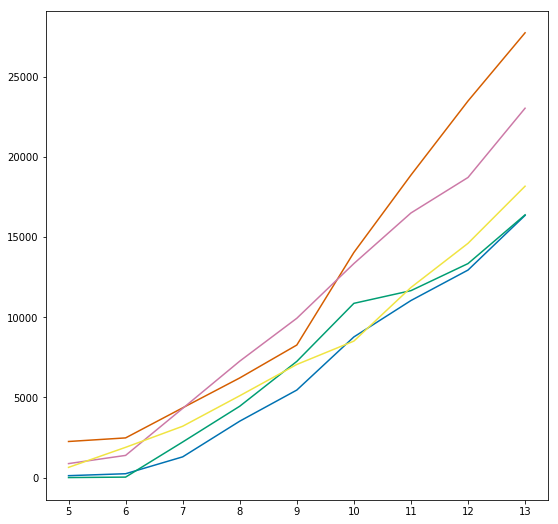

In [181]:
plt.figure(figsize=(9, 9))
for i in y:
    plt.plot(i)

# -----------------------------------

## Clicks

In [183]:
clicks = pd.read_csv('clicks.csv')

In [186]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [187]:
clicks['created'] = pd.to_datetime(clicks['created'])

In [215]:
clicks['advertiser_id'].isna().any()

False

In [206]:
clicks.groupby(clicks['created']).agg('count')['advertiser_id'].nlargest(7)

created
2019-03-07 23:16:30.731    2
2019-03-07 23:24:46.085    2
2019-03-10 01:37:34.402    2
2019-03-10 05:02:10.703    2
2019-03-05 01:17:30.663    1
2019-03-05 01:44:16.824    1
2019-03-05 02:07:49.451    1
Name: advertiser_id, dtype: int64

In [196]:
clicks['created'].describe()

count                          26351
unique                         26347
top       2019-03-10 05:02:10.703000
freq                               2
first     2019-03-05 01:17:30.663000
last      2019-03-13 23:59:59.298000
Name: created, dtype: object

In [198]:
clicks['dia'] = clicks['created'].dt.day
clicks['hora'] = clicks['created'].dt.hour

In [216]:
# advertiser_id nunca es nulo
horarios_top = clicks.groupby(['dia', 'hora']).agg('count').nlargest(5, 'advertiser_id')

In [248]:
n_clicks = horarios_top['advertiser_id']

In [249]:
n_clicks.head()

dia  hora
7    23      2172
9    1       1154
8    1        988
10   2        887
11   1        878
Name: advertiser_id, dtype: int64